# 数据导入

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
train=pd.read_csv(r"C:\Users\97962\Desktop\titantic\train.csv")
test=pd.read_csv(r"C:\Users\97962\Desktop\titantic\test.csv")
print('实验数据大小:',train.shape)
print('预测数据大小:',test.shape)
print(test.columns)
print(train.columns)

实验数据大小: (891, 12)
预测数据大小: (418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
full=pd.concat([train,test],axis=0,ignore_index=True)
full.shape

(1309, 12)

In [6]:
a=np.array([[1,2,3],[2,3,4]])

In [7]:
arr = np.arange(12.).reshape((3, 4))
print(arr)
for i in range(1,3):
    arr[i]=arr[i]-arr[0]
print(arr)



[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
[[0. 1. 2. 3.]
 [4. 4. 4. 4.]
 [8. 8. 8. 8.]]


In [8]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame['fuck']=1
frame.drop(columns='fuck',axis=1,inplace=True)
frame.values


array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

In [9]:
full.tail() #test没有survived这一列

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# 查看特征与标签之间的关系

In [10]:
# import seaborn as sns
# sns.heatmap(titanic_data.corr(),cmap='YlGnBu')
# plt.show()

## Embark 和  Survived 

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

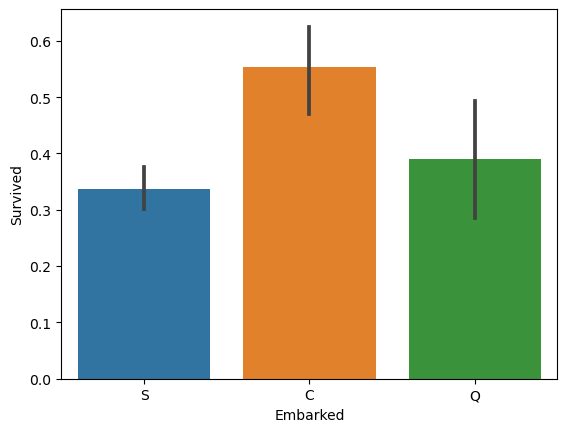

In [11]:
import seaborn as sns
sns.barplot(data=train,x='Embarked',y='Survived')

# 不同登船地点乘客各舱位乘客数量情况。

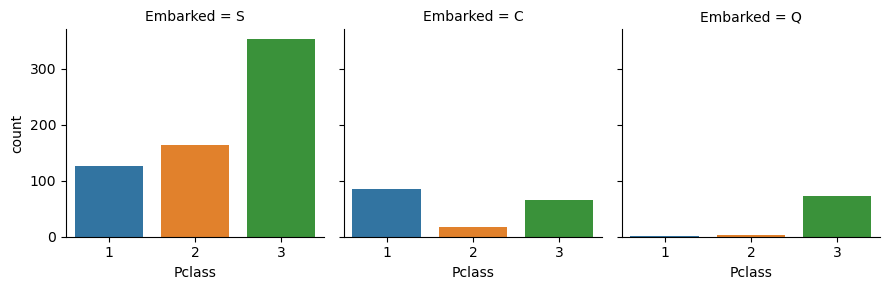

In [12]:
sns.catplot(x='Pclass',col='Embarked',data=train,kind='count',height=3)

# Parch与Survived

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

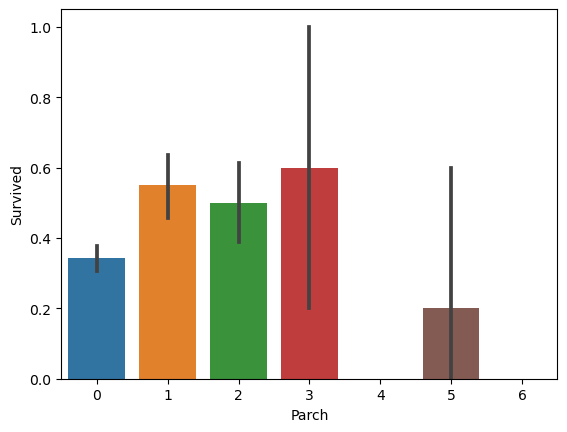

In [13]:
sns.barplot(data=train,x='Parch',y='Survived')

# SibSp与Survived

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

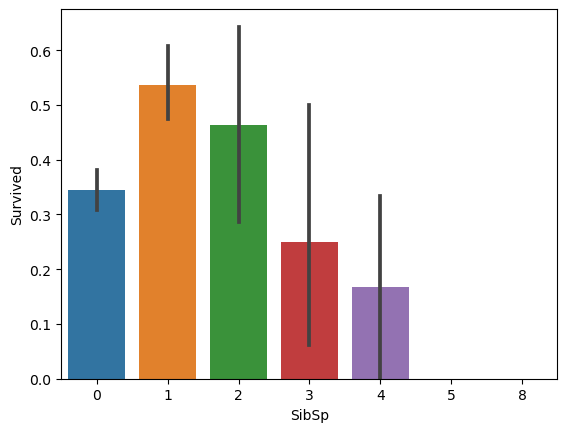

In [14]:
sns.barplot(data=train,x='SibSp',y='Survived')

# Pclass与Survived

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

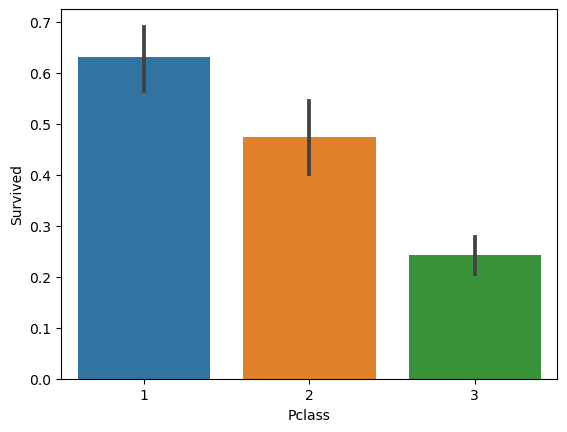

In [15]:
sns.barplot(data=train,x='Pclass',y='Survived')

# Sex与Survived

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

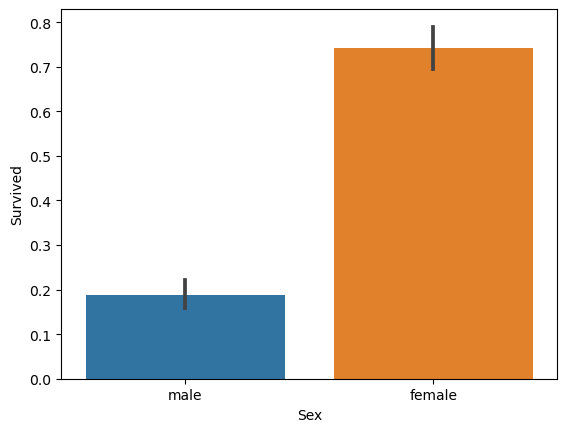

In [16]:
sns.barplot(data=train,x='Sex',y='Survived')

# Age与Survived

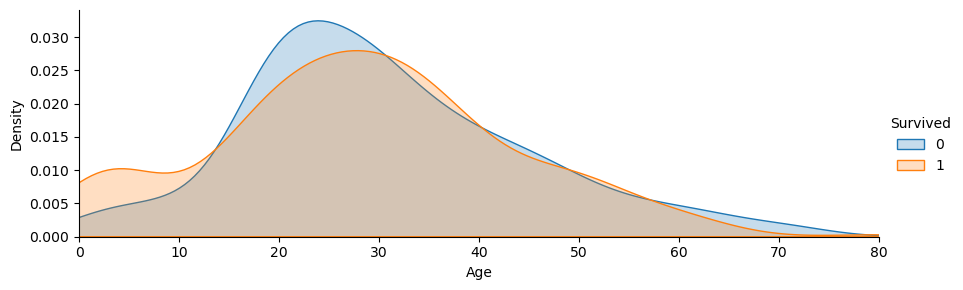

In [17]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

# Fare与Survived

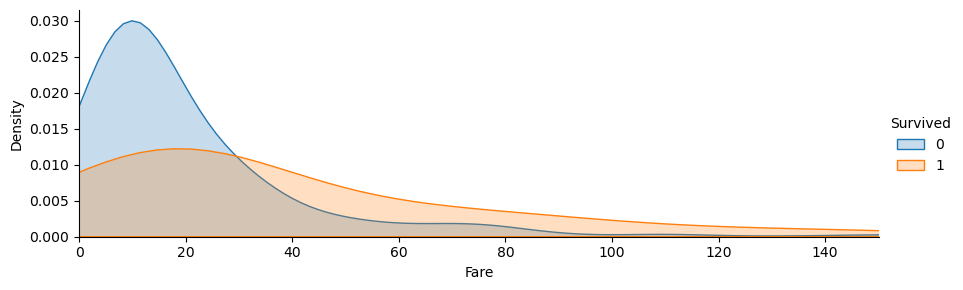

In [18]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

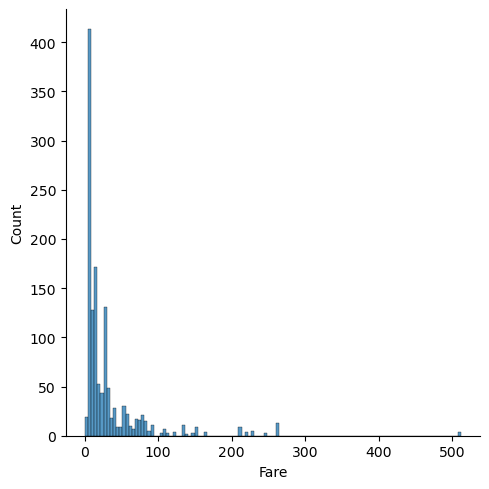

In [19]:
sns.displot(data=full,x='Fare',kind='hist')

Fare的分布呈左偏的形态，其偏度skewness=4.37较大，说明数据偏移平均值较多，因此我们需要对数据进行对数化处理，防止数据权重分布不均匀。

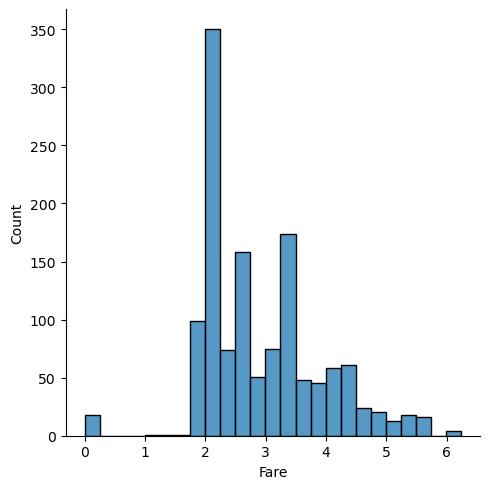

In [20]:
#对数化处理fare值
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else 0)
sns.displot(data=full,x='Fare',kind='hist')

# 数据预处理

数据预处理主要包括以下四个方面内容：

    . 数据清洗（缺失值以及异常值的处理）
    . 特征工程（基于对现有数据特征的理解构造的新特征，以挖掘数据的更多特点）
    . 同组识别（找出具有明显同组效应且违背整体规律的数据，对其数据进行修正）
    . 筛选子集（对数据进行降维，选择子集）

# 缺失值填充

In [21]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

# cabin缺失值

In [22]:
#对Cabin缺失值进行处理，利用U（Unknown）填充缺失值
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

### Embarked缺失值填充

cabin缺失值不多，直接使用众数填充

In [23]:
full['Embarked'].fillna(full['Embarked'].mode(), inplace=True)

# 特征工程

# Name中的头衔信息-Title

In [24]:
#构造新特征Title
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
#查看title数据分布
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

将相近的Title信息整合在一起：

In [25]:
#将title信息进行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

可视化观察新特征与标签间关系

<AxesSubplot:xlabel='Title', ylabel='Survived'>

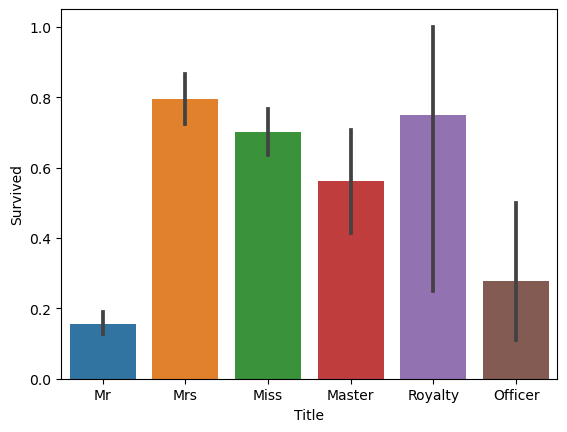

In [26]:
sns.barplot(data=full,x='Title',y='Survived')

头衔为'Mr'及'Officer'的乘客，生存率明显较低。

## FamilyNum及FamilySize信息

将Parch及SibSp字段整合得到一名乘客同行家庭成员总人数FamilyNum的字段，再根据家庭成员具体人数的多少得到家庭规模FamilySize这个新字段。

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

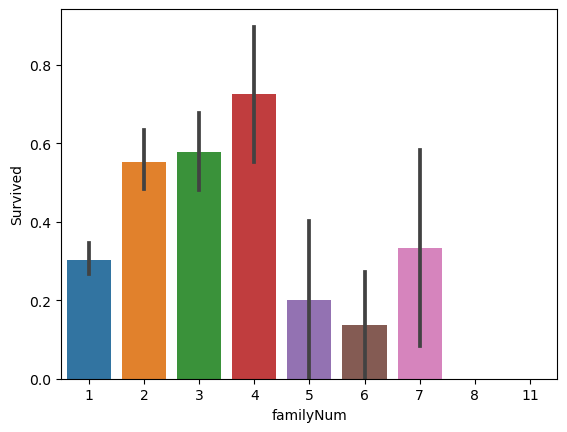

In [27]:
full['familyNum']=full['Parch']+full['SibSp']+1
#查看familyNum与Survived
sns.barplot(data=full,x='familyNum',y='Survived')

In [28]:
#我们按照家庭成员人数多少，将家庭规模分为“小、中、大”三类：
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

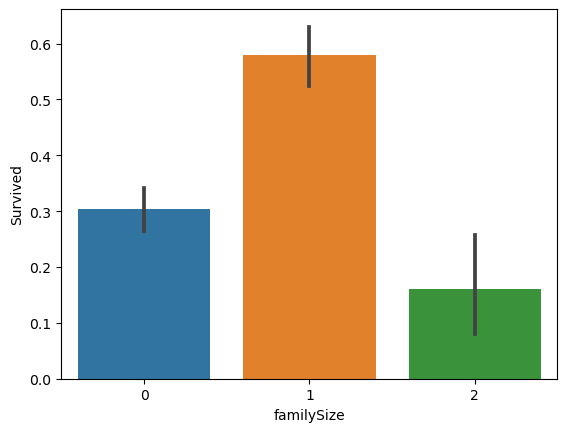

In [29]:
sns.barplot(data=full,x='familySize',y='Survived')

## Cabin客舱类型信息-Deck

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

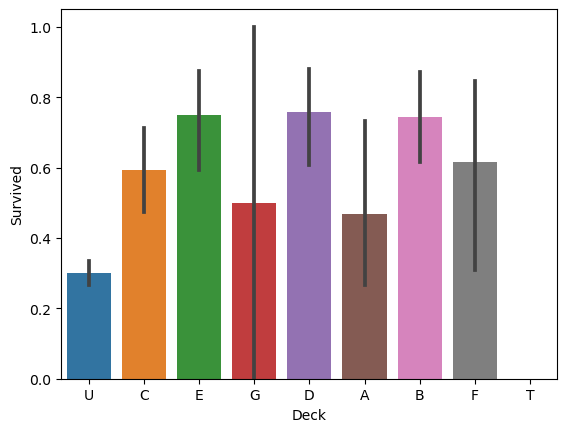

In [30]:
#提取Cabin字段首字母
full['Deck']=full['Cabin'].map(lambda x:x[0])
#查看不同Deck类型乘客的生存率
sns.barplot(data=full,x='Deck',y='Survived')

当乘客的客舱类型为B/D/E时，生存率较高；当客舱类型为U/T时，生存率较低。

## 共票号乘客数量TickCot及TickGroup

In [31]:
TickCountDict=full['Ticket'].value_counts()
print(TickCountDict)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64


In [32]:
full['TickCot']=full['Ticket'].map(TickCountDict)
full.loc[:,['TickCot','Ticket']]

,TickCot,Ticket
0,1,A/5 21171
1,2,PC 17599
2,1,STON/O2. 3101282
3,2,113803
4,1,373450
...,...,...
1304,1,A.5. 3236
1305,3,PC 17758
1306,1,SOTON/O.Q. 3101262
1307,1,359309


<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

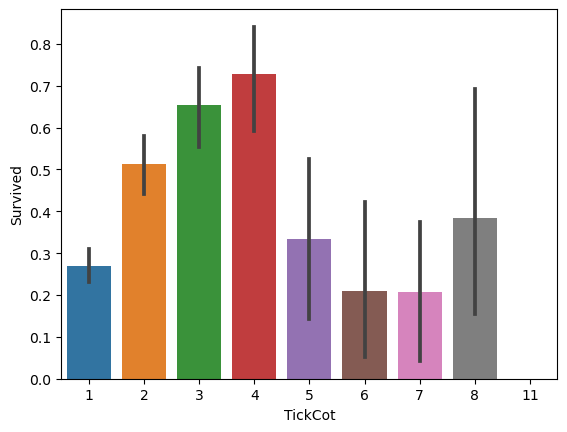

In [33]:
sns.barplot(data=full,x='TickCot',y='Survived')

<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

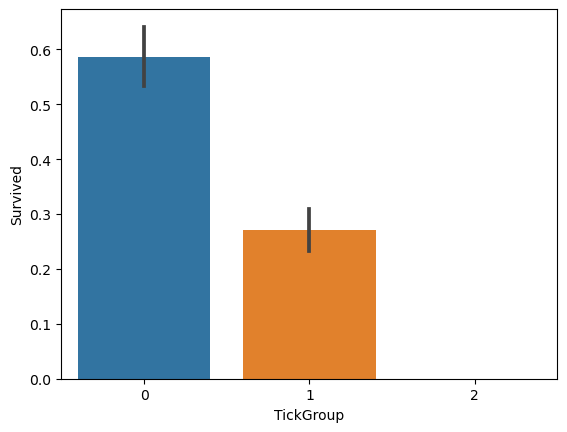

In [34]:
#按照TickCot大小，将TickGroup分为三类。
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#得到各位乘客TickGroup的类别
full['TickGroup']=full['TickCot'].map(TickCountGroup)
#查看TickGroup与Survived之间关系
sns.barplot(data=full,x='TickGroup',y='Survived')

# Age缺失值填充-构建随机森林模型预测缺失的数据

查看Age与Parch、Pclass、Sex、SibSp、Title、familyNum、familySize、Deck、TickCot、TickGroup等变量的相关系数大小，筛选出相关性较高的变量构建预测模型。

In [35]:
full[full['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,U,Q,Mr,1,0,U,1,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,U,S,Mr,1,0,U,1,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,1.977547,U,C,Mrs,1,0,U,1,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,U,C,Mr,1,0,U,1,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.064226,U,Q,Miss,1,0,U,1,1


In [36]:
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
#进行one-hot编码
AgePre=pd.get_dummies(AgePre)
AgePre.head()
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [37]:
#拼接数据
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
#拆分实验集和预测集
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]


In [39]:
#生成实验数据的特征和标签
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']

In [40]:
#生成预测数据的特征
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

In [41]:
#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [42]:
rfr.score(AgeKnown_X,AgeKnown_y)

0.5870888751386507

In [43]:
#预测年龄
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)

In [44]:
# 填入数据
full.loc[full['Age'].isnull(),['Age']]=AgeUnKnown_y
full['Age'].isnull().sum()

0

# 同组识别

虽然通过分析数据已有特征与标签的关系可以构建有效的预测模型，但是部分具有明显共同特征的用户可能与整体模型逻辑并不一致。如果将这部分具有同组效应的用户识别出来并对其数据加以修正，就可以有效提高模型的准确率。在Titancic案例中，我们主要探究相同姓氏的乘客是否存在明显的同组效应。

提取两部分数据，分别查看其“姓氏”是否存在同组效应（因为性别和年龄与乘客生存率关系最为密切，因此用这两个特征作为分类条件）：

In [45]:
#提取乘客的姓氏及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

#将数据分为两组
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

### 男性同组效应分析：

In [46]:
#分析男性同组效应
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

大多数同姓氏的男性存在“同生共死”的特点，因此利用该同组效应，我们对生存率为1的姓氏里的男性数据进行修正，提升其预测为“可以幸存”的概率。

In [47]:
#获得生存率为1的姓氏
MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

### 女性及儿童同组效应分析：

In [48]:
#分析女性及儿童同组效应
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

与男性组特征相似，女性及儿童也存在明显的“同生共死”的特点，因此利用同组效应，对生存率为0的姓氏里的女性及儿童数据进行修正，提升其预测为“并未幸存”的概率。

In [49]:
#获得生存率为0的姓氏
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

对数据集中这些姓氏的两组数据数据分别进行修正：

男性数据修正为：1、性别改为女；2、年龄改为5；

女性及儿童数据修正为：1、性别改为男；2、年龄改为60。

In [50]:
#对数据集中这些姓氏的男性数据进行修正：1、性别改为女；2、年龄改为5。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'

#对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

### 筛选子集

在对数据进行分析处理的过程中，数据的维度更高了，为提升数据有效性需要对数据进行降维处理。通过找出与乘客生存率“Survived”相关性更高的特征，剔除重复的且相关性较低的特征，从而实现数据降维。

In [51]:
#人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059749
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.331805
Survived      1.000000
Name: Survived, dtype: float64

通过热力图，查看Survived与其他特征间相关性大小。

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Fare'),
  Text(3.5, 0, 'Parch'),
  Text(4.5, 0, 'Pclass'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'familyNum'),
  Text(7.5, 0, 'familySize'),
  Text(8.5, 0, 'TickCot'),
  Text(9.5, 0, 'TickGroup')])

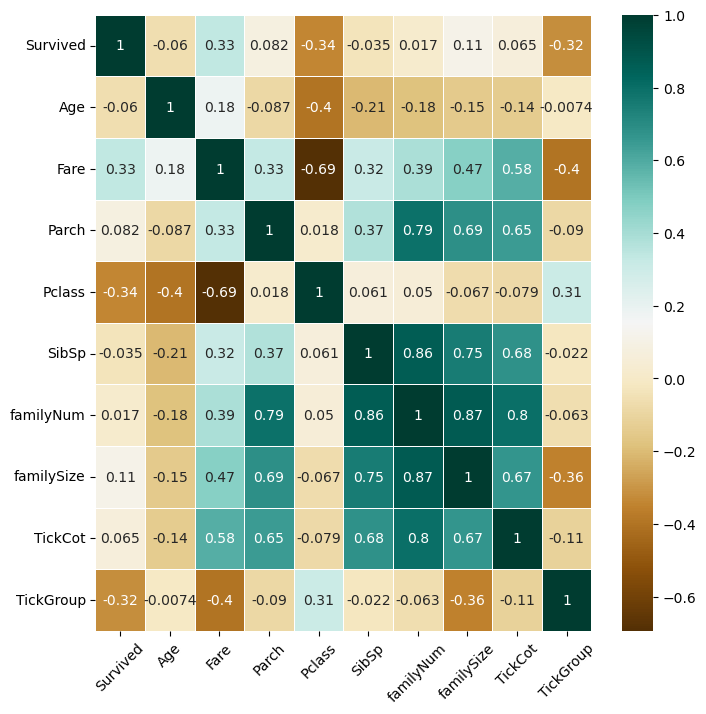

In [52]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [53]:
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
#one-hot编码
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

# 构建模型


本文先比较了SCV/Decision Tree/Gradient Boosting/Neural network/KNN/Logistic Regression等多种机器学习算法的结果，并对表现较好的Gradient Boosting及Logistic Regression做进一步的对比，最终选择Gradient Boosting对乘客生存率进行预测。

In [76]:
#拆分实验数据与预测数据
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]

experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)

#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from xgboost import XGBClassifier

#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

In [77]:
# 不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))

In [79]:
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna','XGBClassifier']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.763296,0.051620,SVC
1,0.775605,0.060571,DecisionTreeCla
2,0.812609,0.043903,RandomForestCla
3,0.801386,0.038369,ExtraTreesCla
4,0.835056,0.045615,GradientBoostingCla
5,0.798015,0.039669,KNN
6,0.828315,0.031592,LR
7,0.823833,0.029460,LinearDiscrimiAna
8,0.826092,0.046942,XGBClassifier


In [57]:
# sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':cv_std})

# cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
#             sharey=False,aspect=2)
# cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
#                palette='muted')
# cvResFacet.set(xlim=(0.7,0.9))
# cvResFacet.add_legend()

In [100]:
#GradientBoostingClassifier模型
xgb = XGBClassifier()
# gb_param_grid = {'loss' : ["deviance"],
#               'n_estimators' : [100,200,300],
#               'learning_rate': [0.01,0.6,0.01],
#               'max_depth': [4,7,1],
#               'min_samples_leaf': [100,150],
#               'max_features': [0.3, 0.1] 
#               }
gb_param_grid = {
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1,0.6,0.01],
              'max_depth': [4,10,1],
              }
modelgsGBC = GridSearchCV(xgb,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator

In [101]:
print('modelgsGBC模型得分为：%.3f'%modelgsGBC.best_score_)

modelgsGBC模型得分为：0.844


### 查看模型ROC曲线

<Figure size 640x480 with 0 Axes>

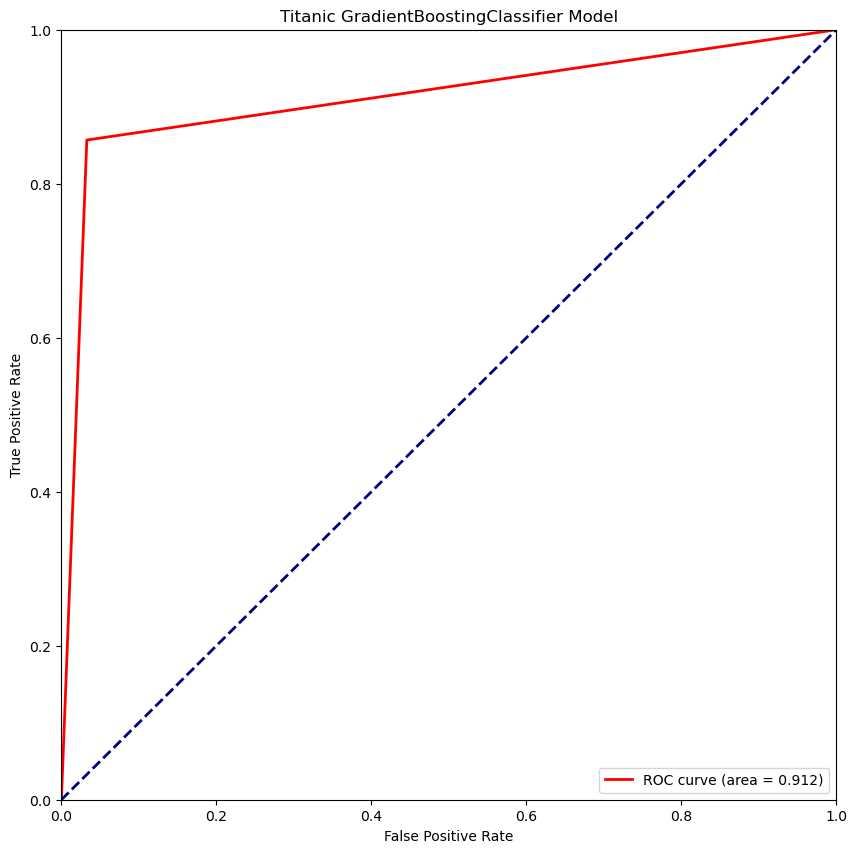

In [102]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

# 模型预测

In [103]:
#TitanicGBSmodle
GBCpreData_y=modelgsGBC.predict(preData_X)
GBCpreData_y=GBCpreData_y.astype(int)
#导出预测结果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf
#将预测结果导出为csv文件
GBCpreResultDf.to_csv(r"C:\Users\97962\Desktop\titantic\TitanicGBSmodle.csv",index=False)